In [1]:
from transformers import BertTokenizer, BertModel
from datasets import load_dataset
import torch
import os

In [6]:
#getting and saving dataset

imdb_dataset = load_dataset("imdb")

imdb_dataset['train'].to_csv('imdb_train.csv', index = False)
imdb_dataset['test'].to_csv('imdb_test.csv', index = False)

Creating CSV from Arrow format:   0%|          | 0/25 [00:00<?, ?ba/s]

Creating CSV from Arrow format:   0%|          | 0/25 [00:00<?, ?ba/s]

32540147

In [7]:
import pandas as pd
import numpy as np

train_df = pd.read_csv('imdb_test.csv')
test_df = pd.read_csv('imdb_test.csv')

all_texts = pd.concat([train_df['text'], test_df['text']], ignore_index=True)

In [8]:
from tokenizers import models, trainers, pre_tokenizers, decoders, Tokenizer, processors

tokenizer = Tokenizer(model=models.WordPiece(unk_token="[UNK]"))

tokenizer.pre_tokenizer = pre_tokenizers.Whitespace()
tokenizer.decode = decoders.WordPiece(prefix="##")

trainer = trainers.WordPieceTrainer(
    vocab_size=30000,
    min_frequency=2,
    special_tokens=["[PAD]", "[UNK]", "[CLS]", "[SEP]", "[MASK]"]
)

def batch_iterator(batch_size=1000):
    for i in range(0, len(all_texts), batch_size):
        yield all_texts[i:i+batch_size].tolist()


tokenizer.train_from_iterator(batch_iterator(), trainer=trainer)

tokenizer.save("custom_tokenizer.json")

In [9]:
from collections import Counter
import matplotlib.pyplot as plt

vocab = tokenizer.get_vocab()

id2token = {id: token for token, id in vocab.items()}

token_freqs = Counter()

for batch in batch_iterator():
    encodings = tokenizer.encode_batch(batch)
    for encoding in encodings:
        tokens = encoding.tokens
        token_freqs.update(tokens)

sorted_token_freqs = token_freqs.most_common()

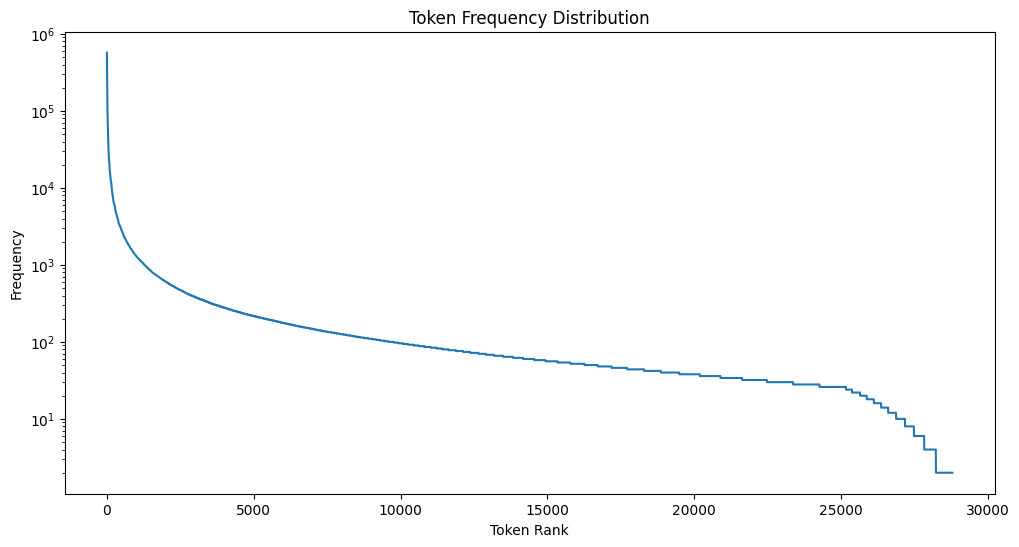

In [10]:
tokens, freqs = zip(*sorted_token_freqs)

plt.figure(figsize=(12, 6))
plt.plot(freqs)
plt.xlabel('Token Rank')
plt.ylabel('Frequency')
plt.title('Token Frequency Distribution')
plt.yscale('log')  
plt.show()
